In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
%matplotlib inline

from Subset_Model import RGCCA

In [3]:
data_dir = "/home/ng255707/Documents/Parsimony/Glioma_Data/CV/"

# Exp 1: Config 1_2_2_Fista:

## Meilleur résultat

Sur le jeu de donnée réduites (4341 gènes en GE présents dans les pathways Kegg, 1229 segments CGH), recherche de paramètres par 5-fold RandomSearchCV. Le modèle CCA à 3 blocs (hiérarchique) est contraint par:
- Sur le bloc GE:
    - Contrainte L1 (param_l1)
    - Contrainte RGCCA (tau = 1 par SS)
- Sur le bloc CGH:
    - Contrainte L1 (param_l2)
    - Contrainte RGCCA (tau = 1)
- Sur le bloc Y: Contrainte RGCCA tau = 1

Les données sont standardisée et divisé par racine de 1/n_features avant la CCA. Le modèle est évalué avec le score de classification de la localisation par une LDA. Le script pour cette expérience est Subset_Model.py

In [4]:
results = pd.read_csv(data_dir + 'config_1_2_2_Fista.csv').drop('Unnamed: 0',axis=1)
best_mod = np.load(data_dir + 'best_estimator_config_1_2_2_Fista.npy').item().steps[1][1]

In [5]:
p = results.mean_test_score.max()
results.loc[results.mean_test_score == p].drop('params',axis=1).head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_rgcca__l1,param_rgcca__l2,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
25,2.835002,0.003577,0.811321,0.929236,782.833283,144.942539,1,0.909091,0.928571,0.909091,...,0.727273,0.952381,0.7,0.930233,0.8,0.930233,0.795614,0.000942,0.088297,0.01508


In [5]:
results.mean_fit_time.mean()

6.016632079184055

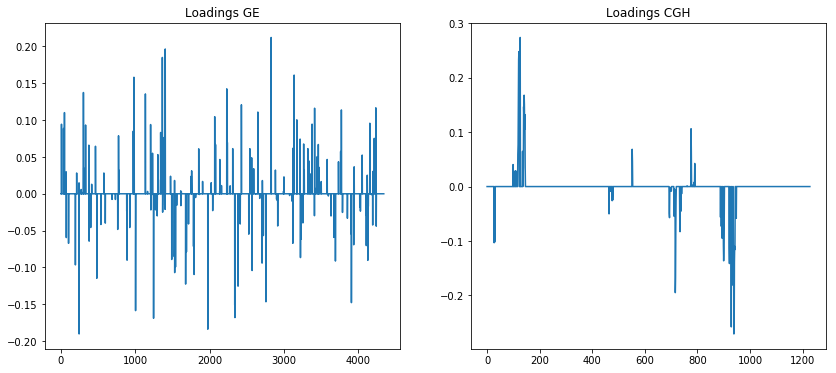

In [6]:
w = best_mod.w
plt.figure(figsize=(14,6))
plt.subplot(121)
plt.plot(w[0])
plt.title('Loadings GE')
plt.subplot(122)
plt.plot(w[1])
plt.title('Loadings CGH');

Number of significant contributions: (153,)
Number of significant contributions: (70,)


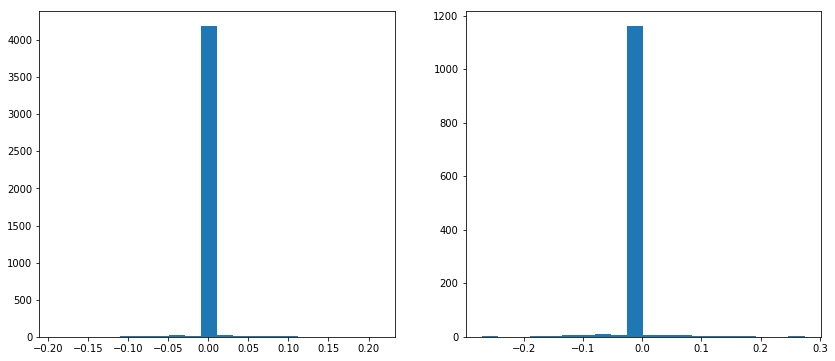

In [7]:
plt.figure(figsize=(14,6))
plt.subplot(121)
print 'Number of significant contributions: {}'.format(np.where(abs(w[0]) > 1e-2)[0].shape)
plt.hist(w[0],bins=20);
print 'Number of significant contributions: {}'.format(np.where(abs(w[1]) > 1e-2)[0].shape)
plt.subplot(122)
plt.hist(w[1],bins=20);

In [8]:
best_mod.info['converged']

True

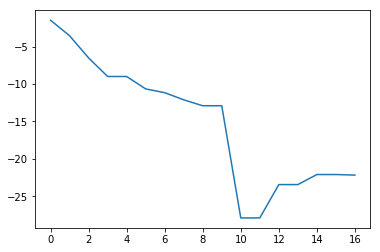

In [9]:
plt.plot(np.array(best_mod.info['func_val']).flatten());

In [57]:
best_mod.info['num_iter']

[8, 8, 4]

In [129]:
def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

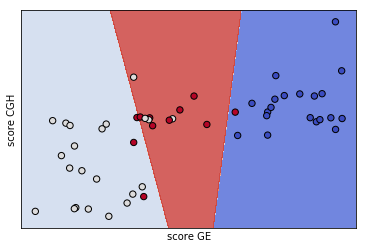

In [130]:
xx, yy = make_meshgrid(best_mod.t1, best_mod.t2)
fig, sub = plt.subplots(1, 1)
ax = sub
clf = best_mod.lda
plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(best_mod.t1.flatten(),best_mod.t2.flatten(), c=best_mod.labels, cmap=plt.cm.coolwarm, s=40, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('score GE')
ax.set_ylabel('score CGH')
ax.set_xticks(())
ax.set_yticks(())

plt.show()

# Exp 2: Config 2_2_2_Conesta

Sur le jeu de donnée réduites (15702 gènes en GE présents dans les pathways Kegg, 1229 segments CGH), recherche de paramètres par 5-fold RandomSearchCV. Le modèle CCA à 3 blocs (hiérarchique) est contraint par:
- Sur le bloc GE:
    - Contrainte L1 (param_l1)
    - Contrainte RGCCA (tau = 1 par SS)
    - GraphTV (param_g1)
- Sur le bloc CGH:
    - Contrainte L1 (param_l2)
    - Contrainte RGCCA (tau = 1)
- Sur le bloc Y: Contrainte RGCCA tau = 1

Les données sont standardisée et divisé par racine de 1/n_features avant la CCA. Le modèle est évalué avec le score de classification de la localisation par une LDA. Le script pour cette expérience est Subset_Model.py

In [60]:
results = pd.read_csv(data_dir + 'config_2_2_2_Conesta.csv').drop('Unnamed: 0',axis=1)
best_mod = np.load(data_dir + 'best_estimator_config_2_2_2_Conesta.npy').item().steps[1][1]

In [61]:
p = results.mean_test_score.max()
results.loc[results.mean_test_score == p].drop('params',axis=1).head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_rgcca__g1,param_rgcca__l1,param_rgcca__l2,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
32,128.349489,0.002750,0.792453,0.915282,-4,270.107171,245.689957,1,0.909091,0.904762,...,0.727273,0.97619,0.7,0.883721,0.8,0.906977,7.291336,0.000671,0.073934,0.031611
51,123.691131,0.003030,0.792453,0.910520,-6,326.757086,245.350416,1,0.909091,0.880952,...,0.727273,0.97619,0.7,0.883721,0.8,0.906977,3.325614,0.000750,0.073934,0.034499
99,124.946243,0.002509,0.792453,0.910631,-5,228.823992,247.909407,1,0.909091,0.904762,...,0.727273,0.97619,0.7,0.883721,0.8,0.883721,6.228553,0.000411,0.073934,0.034103


In [62]:
results.mean_fit_time.mean()

123.85262355870671

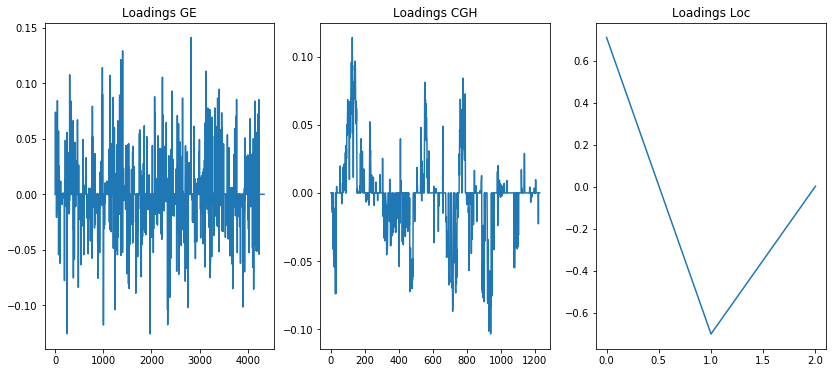

In [63]:
w = best_mod.w
plt.figure(figsize=(14,6))
plt.subplot(131)
plt.plot(w[0])
plt.title('Loadings GE')
plt.subplot(132)
plt.plot(w[1])
plt.title('Loadings CGH');
plt.subplot(133)
plt.plot(w[2])
plt.title('Loadings Loc');

Number of significant contributions: (439,)
Number of significant contributions: (430,)


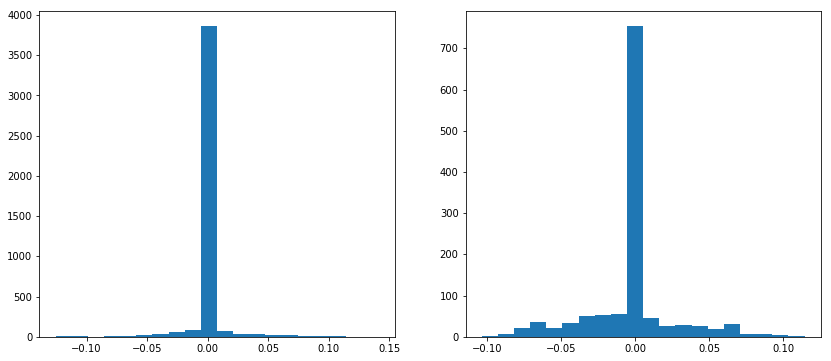

In [64]:
plt.figure(figsize=(14,6))
plt.subplot(121)
print 'Number of significant contributions: {}'.format(np.where(abs(w[0]) > 1e-2)[0].shape)
plt.hist(w[0],bins=20);
print 'Number of significant contributions: {}'.format(np.where(abs(w[1]) > 1e-2)[0].shape)
plt.subplot(122)
plt.hist(w[1],bins=20);

In [52]:
best_mod.info['converged']

True

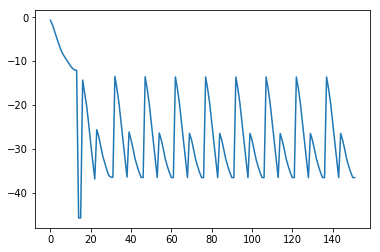

In [66]:
plt.plot(best_mod.info['fvalue']);

In [100]:
prob = []
with open('log.txt','r') as log:
    l = log.readlines()
    for line in l:
        prob.append(json.loads(line))

In [80]:
iter0 = []
for exp in prob:
    iter0.append(exp['num_iter'][0])
iter0 = pd.Series(iter0)

KeyError: 'num_iter'

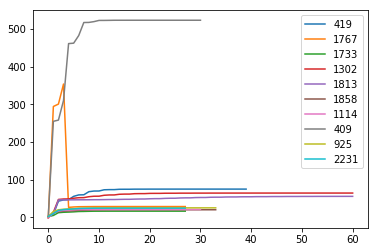

In [107]:
for i in range(10):
    j = np.random.randint(96*5*5)
    #plt.figure()
    plt.plot(prob[j]['func_val'],label=j)
    plt.legend(loc='best')

In [109]:
prob[1767]

{u'adj': None,
 u'converged': True,
 u'func_val': [-1.7703146485415158,
  294.30697833495856,
  300.71918473730324,
  353.94606106687314,
  26.257028871091883,
  27.34091649503314,
  27.97228319763399,
  28.111970275755407,
  28.257661780597545,
  28.37469369439193,
  28.398873892114004,
  28.417891844787597,
  28.433223679566098,
  28.436376947166508,
  28.438489353847345,
  28.440279928112425,
  28.44064876908252,
  28.440883065644076,
  28.44108646583235,
  28.441128413982817,
  28.441155050269003,
  28.441178190032083,
  28.441182969473566,
  28.441186004654845,
  28.441188643477282,
  28.441189188596493,
  28.44118953442024,
  28.441189835217425],
 u'g1': 0,
 u'l1': 0.8143881291263064,
 u'l2': 0.5368535303427675,
 u'p': 4341,
 u'q': 1229,
 u'tau': None}

## Glioma linear time proj

In [2]:
from GraphNet import SGCCA

In [3]:
results = pd.read_csv('config_L1L1_proj_yo.csv').drop('Unnamed: 0',axis=1)
best_mod = np.load('best_estimator_config_L1L1_proj_yo.npy').item().steps[1][1]

In [4]:
p = results.mean_test_score.max()
results.loc[results.mean_test_score == p].drop('params',axis=1).head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_sgcca__l1,param_sgcca__l2,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
71,0.151143,0.001742,0.811321,0.915282,0.188396,0.500710,1,0.909091,0.904762,0.909091,...,0.727273,0.97619,0.7,0.883721,0.8,0.906977,0.041458,0.000631,0.088297,0.031611
110,0.098813,0.001404,0.811321,0.915282,0.195244,0.542911,1,0.909091,0.904762,0.909091,...,0.727273,0.97619,0.7,0.883721,0.8,0.906977,0.003252,0.000095,0.088297,0.031611
157,0.131433,0.001388,0.811321,0.910631,0.206081,0.673640,1,0.909091,0.904762,0.909091,...,0.727273,0.97619,0.7,0.883721,0.8,0.883721,0.014303,0.000122,0.088297,0.034103
192,0.096827,0.001325,0.811321,0.910631,0.228068,0.791490,1,0.909091,0.904762,0.909091,...,0.727273,0.97619,0.7,0.883721,0.8,0.883721,0.003933,0.000020,0.088297,0.034103
214,0.121039,0.001630,0.811321,0.910631,0.211376,0.663148,1,0.909091,0.904762,0.909091,...,0.727273,0.97619,0.7,0.883721,0.8,0.883721,0.012414,0.000370,0.088297,0.034103


In [34]:
results.param_sgcca__l1.min() * np.sqrt(4341)

1.1633864285644027

In [35]:
results.mean_fit_time.mean()

0.10356739183266958

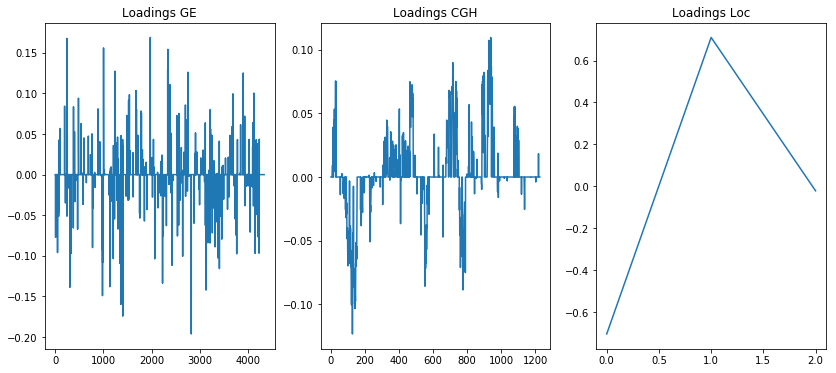

In [36]:
w = best_mod.w
plt.figure(figsize=(14,6))
plt.subplot(131)
plt.plot(w[0])
plt.title('Loadings GE')
plt.subplot(132)
plt.plot(w[1])
plt.title('Loadings CGH');
plt.subplot(133)
plt.plot(w[2])
plt.title('Loadings Loc');

In [37]:
best_mod.get_params()

{'adj': None,
 'alg': None,
 'g1': 0,
 'l1': 0.18839551356665526,
 'l2': 0.500710313547274,
 'p': 4341,
 'q': 1229,
 'tau': None}

Number of significant contributions: (216,)
Number of significant contributions: (377,)


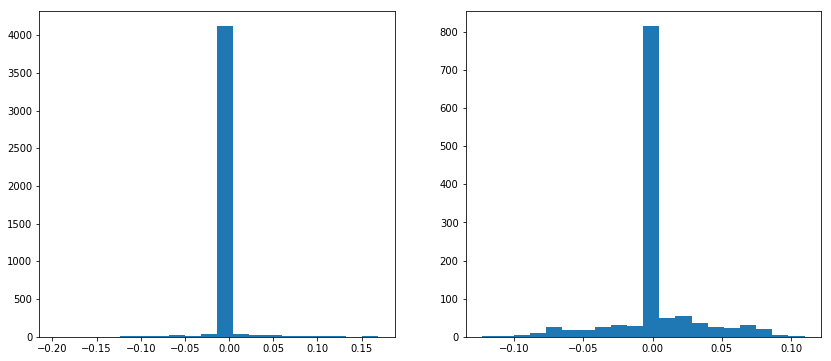

In [38]:
plt.figure(figsize=(14,6))
plt.subplot(121)
print 'Number of significant contributions: {}'.format(np.where(abs(w[0]) > 1e-2)[0].shape)
plt.hist(w[0],bins=20);
print 'Number of significant contributions: {}'.format(np.where(abs(w[1]) > 1e-2)[0].shape)
plt.subplot(122)
plt.hist(w[1],bins=20);

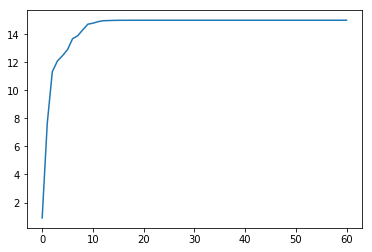

In [39]:
plt.plot(best_mod._f)

In [6]:
std = np.load('best_estimator_config_L1L1_proj_yo.npy').item().steps[0][1]

In [7]:
data_dir = "./"    
data = pd.read_csv(data_dir + 'Data_Subset.csv').drop('Unnamed: 0', axis=1)
X2 = data.loc[:,data.columns.str.startswith('CGH')].values
X2 /= np.sqrt(X2.shape[1])
y = data.loc[:,data.columns[-3:]].values
X1 = data.loc[:,data.columns.str.startswith('GE')].values
X1 /= np.sqrt(X1.shape[1])
p , q = X1.shape[1],X2.shape[1]
X = std.transform(np.concatenate((X1,X2),axis=1))
X1 = X[:,:p]
X2 = X[:,p:p + q]

t1 = np.dot(X1,best_mod.w[0])
t2 = np.dot(X2,best_mod.w[1])
predictors = np.concatenate([np.vstack(t1),np.vstack(t2)],axis=1)



In [8]:
def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    plt.figure(figsize=(10,10))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    t_min = min(x_min,y_min)
    t_max = max(x_max,y_max)
    xx, yy = np.meshgrid(np.arange(t_min, t_max, h),
                         np.arange(t_min, t_max, h))
    return xx, yy

In [9]:
_, labels = np.where(y == 1)
best_mod.lda.score(predictors,labels)

0.9056603773584906

In [20]:
data.index[labels == c].values

array([ 2,  3,  4,  6,  7,  8, 17, 19, 24, 27, 30, 33, 34, 36, 38, 39, 40,
       42, 44, 46])

(0, 'cort', 'b')
(1, 'dipg', 'gray')
(2, 'midl', 'r')


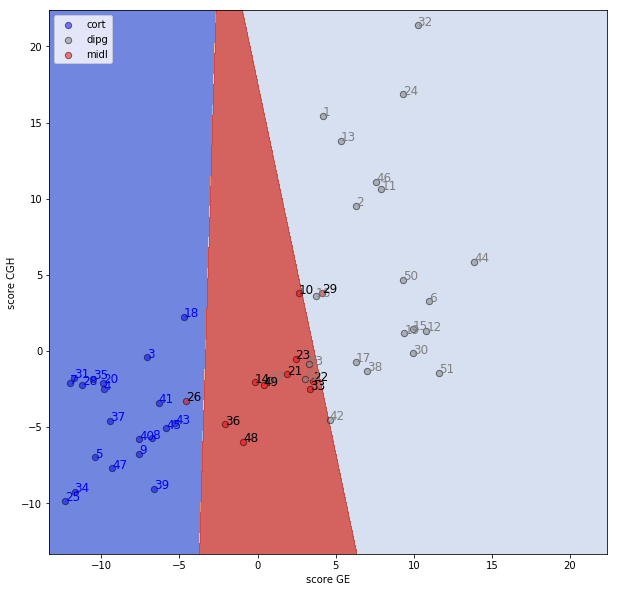

<Figure size 720x720 with 0 Axes>

In [36]:
xx, yy = make_meshgrid(t1, t2)
fig, sub = plt.subplots(1, 1,figsize=(10,10));
ax = sub
clf = best_mod.lda
col = ['b','gray','r']
plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
for c,label in zip([0,1,2],['cort','dipg','midl']):
    print(c,label,col[c])
    ax.scatter(t1[labels == c],t2[labels == c], c=col[c], cmap=plt.cm.coolwarm, s=40, edgecolors='k',label=label,alpha=0.5)

col = ['b','gray','black']
for i in range(data.shape[0]):
    ax.text(t1[i], t2[i], str(i+1), {'color': col[labels[i]], 'fontsize': 12},label=['cort','dipg','midl'][labels[i]])
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('score GE')
ax.set_ylabel('score CGH')
ax.legend(loc='upper left')


plt.show();

In [34]:
best_mod.lda.predict(predictors)[25]

0

Number of significant contributions: (439,)
Number of significant contributions: (430,)


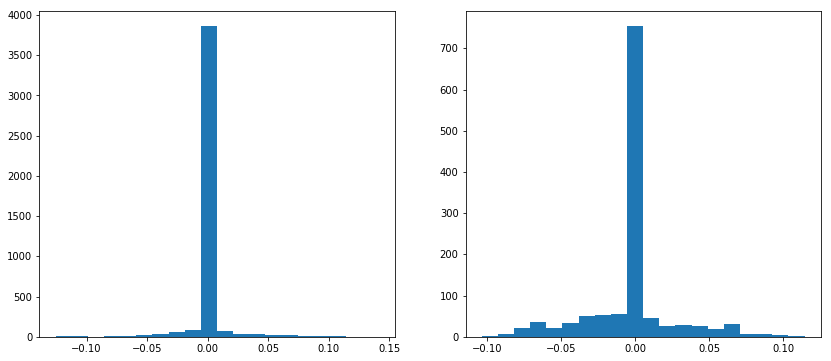

In [64]:
plt.figure(figsize=(14,6))
plt.subplot(121)
print 'Number of significant contributions: {}'.format(np.where(abs(w[0]) > 1e-2)[0].shape)
plt.hist(w[0],bins=20);
print 'Number of significant contributions: {}'.format(np.where(abs(w[1]) > 1e-2)[0].shape)
plt.subplot(122)
plt.hist(w[1],bins=20);

## Glioma GraphNet

In [110]:
from GraphNet import SGCCA

In [130]:
results = pd.read_csv('config_L1L1_GraphNet.csv').drop('Unnamed: 0',axis=1)
best_mod = np.load('best_estimator_config_L1L1_GraphNet.npy').item().steps[1][1]

In [131]:
p = results.mean_test_score.max()
results.loc[results.mean_test_score == p].drop('params',axis=1).head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_sgcca__g1,param_sgcca__l1,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,106.775816,0.004461,0.773585,0.853710,0.740503,0.643123,1,0.909091,0.785714,0.818182,...,0.636364,0.904762,0.7,0.860465,0.8,0.860465,10.117251,0.002422,0.096359,0.038296
3,128.751487,0.002765,0.773585,0.863123,-4.405786,0.479695,1,0.909091,0.785714,0.818182,...,0.636364,0.928571,0.7,0.883721,0.8,0.860465,12.622421,0.000207,0.096359,0.046352
5,130.381490,0.003085,0.773585,0.863123,-4.605470,0.465058,1,0.909091,0.785714,0.818182,...,0.636364,0.928571,0.7,0.883721,0.8,0.860465,11.634333,0.001008,0.096359,0.046352
6,42.029297,0.002363,0.773585,0.863123,-3.649432,0.994980,1,0.909091,0.809524,0.818182,...,0.636364,0.904762,0.7,0.860465,0.8,0.883721,4.052369,0.000179,0.096359,0.031855
7,42.677597,0.002839,0.773585,0.863123,-1.881491,0.933609,1,0.909091,0.809524,0.818182,...,0.636364,0.904762,0.7,0.860465,0.8,0.883721,3.541166,0.000257,0.096359,0.031855


In [132]:
results.mean_fit_time.mean()

164.2166065427992

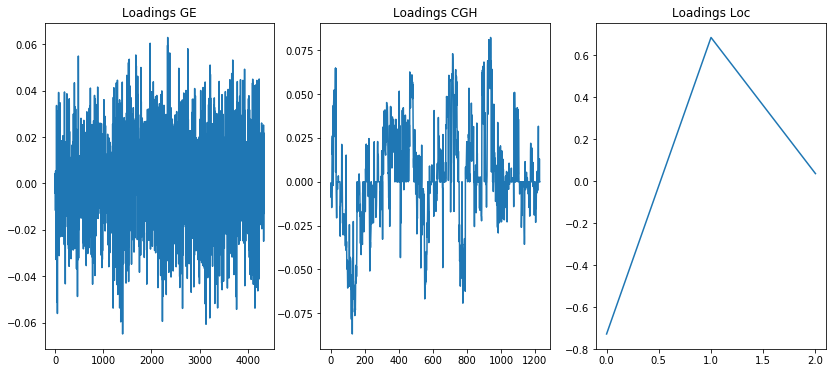

In [133]:
w = best_mod.w
plt.figure(figsize=(14,6))
plt.subplot(131)
plt.plot(w[0])
plt.title('Loadings GE')
plt.subplot(132)
plt.plot(w[1])
plt.title('Loadings CGH');
plt.subplot(133)
plt.plot(w[2])
plt.title('Loadings Loc');

In [134]:
best_mod.get_params()

{'adj': <4341x4341 sparse matrix of type '<type 'numpy.float64'>'
 	with 24569 stored elements in Compressed Sparse Row format>,
 'g1': 1,
 'l1': 0.6431229814802406,
 'l2': 0.7,
 'p': 4341,
 'q': 1229,
 'tau': None}

Number of significant contributions: (1623,)
Number of significant contributions: (707,)


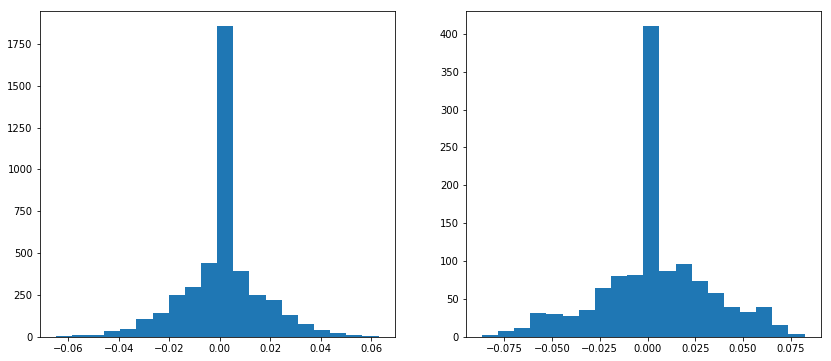

In [135]:
plt.figure(figsize=(14,6))
plt.subplot(121)
print 'Number of significant contributions: {}'.format(np.where(abs(w[0]) > 1e-2)[0].shape)
plt.hist(w[0],bins=20);
print 'Number of significant contributions: {}'.format(np.where(abs(w[1]) > 1e-2)[0].shape)
plt.subplot(122)
plt.hist(w[1],bins=20);

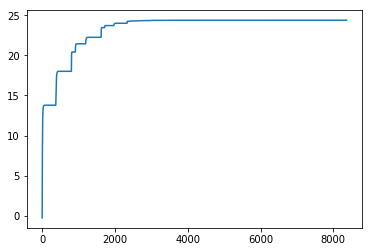

In [136]:
plt.plot(best_mod._f)

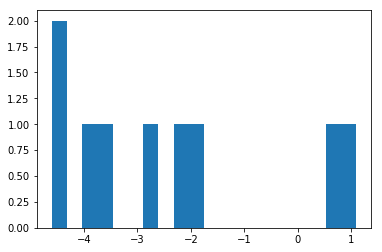

In [137]:
plt.hist(results.param_sgcca__g1,bins=20);